# K_Means_1.0

En este script se va a hacer uso de la utilidad K-Means contenida en SKLEARN para encontrar “K” grupos (clusters) entre los datos crudos.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [22]:
df_inc=pd.read_csv('../DATASETS/AHOGADOS/CSV/historico_inc_est_meteo_codigos_test.csv',sep='|',error_bad_lines=False)

In [23]:
df_inc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 45 columns):
Fecha               5468 non-null object
Mes                 5468 non-null float64
IdAhogado           5468 non-null int64
IdPersona           5468 non-null int64
Localidad           5468 non-null object
Provincia           5468 non-null object
CCAA                5468 non-null object
Hora                4477 non-null object
Latitud             5468 non-null float64
Longitud            5468 non-null float64
Sexo                5467 non-null object
Edad                4510 non-null float64
Nacionalidad        5424 non-null object
ID                  5468 non-null int64
Estacion            5468 non-null object
Estado_x            5468 non-null object
Latitud_y           5468 non-null float64
Longitud_y          5468 non-null float64
T_med               5468 non-null float64
T_max               5468 non-null float64
T_min               5468 non-null float64
Precipitaciones     5468 n

In [24]:
df_inc.columns

Index(['Fecha', 'Mes', 'IdAhogado', 'IdPersona', 'Localidad', 'Provincia',
       'CCAA', 'Hora', 'Latitud', 'Longitud', 'Sexo', 'Edad', 'Nacionalidad',
       'ID', 'Estacion', 'Estado_x', 'Latitud_y', 'Longitud_y', 'T_med',
       'T_max', 'T_min', 'Precipitaciones', 'Presion', 'Dir. vi.', 'V_Viento',
       'Nub.', 'Prof. nieve (cm)', 'Insolac. (horas)', 'Distancia',
       'IdActividad', 'IdCausa', 'IdDeteccion', 'IdFactor', 'IdInterv',
       'IdOrigen', 'IdPronostico', 'Mortal', 'IdReanima', 'IdRiesgo', 'IdTipo',
       'IdVigilancia', 'Poblacion', 'PobProv', 'Costa', 'IdLocal'],
      dtype='object')

In [25]:
df_inc_clust=df_inc[['Mes', 'Latitud', 'Longitud', 'Edad', 'Latitud_y', 'Longitud_y', 'T_med',
       'T_max', 'T_min', 'Precipitaciones', 'Dir. vi.', 'V_Viento', 'Distancia',
       'IdPronostico', 'Poblacion', 'PobProv']]

In [26]:
df_inc_clust.describe()

Mes      Latitud     Longitud         Edad    Latitud_y  \
count  5468.000000  5468.000000  5468.000000  4510.000000  5468.000000   
mean      6.974031     0.702602    -0.050676    45.296674     0.702820   
std       2.483320     0.042276     0.064035    24.669899     0.041281   
min       1.000000     0.539029    -0.172804    -1.000000     0.628319   
25%       6.000000     0.666957    -0.103687    24.000000     0.668170   
50%       7.000000     0.699117    -0.047858    47.000000     0.697259   
75%       8.000000     0.742257    -0.002092    67.000000     0.740601   
max      12.000000     0.810914     0.153633    96.000000     0.764202   

        Longitud_y        T_med        T_max        T_min  Precipitaciones  \
count  5468.000000  5468.000000  5468.000000  5468.000000      5468.000000   
mean     -0.051184    20.689100    25.667721    15.708998         2.496928   
std       0.062887     6.356178     7.361037     6.149915        10.590294   
min      -0.162165     0.600000     1.500000    -5.900000         0.000000   
25%      -0.105302    16.600000    20.600000    11.900000         0.000000   
50%      -0.047153    21.800000    27.000000    16.700000         0.000000   
75%      -0.008145    25.800000    31.000000    20.300000         0.000000   
max       0.073886    38.000000    45.300000    32.800000       171.600000   

          Dir. vi.     V_Viento    Distancia  IdPronostico     Poblacion  \
count  5463.000000  5468.000000  5468.000000   5374.000000  4.995000e+03   
mean    170.457304    11.159108    26.899393      4.972646  4.536344e+06   
std     101.839314     5.993863    26.363243      3.010342  4.554755e+06   
min       0.000000     0.000000     0.134837      1.000000  8.495900e+04   
25%      73.000000     7.000000    10.257724      1.000000  1.308750e+06   
50%     173.000000    10.000000    20.882147      7.000000  2.708339e+06   
75%     257.000000    13.000000    36.691755      7.000000  4.941509e+06   
max     360.000000    52.000000   750.045157     11.000000  2.119416e+07   

            PobProv  
count  5.061000e+03  
mean   1.197498e+06  
std    1.075680e+06  
min    0.000000e+00  
25%    5.802950e+05  
50%    9.427310e+05  
75%    1.630615e+06  
max    6.507184e+06

In [27]:
df_inc_clust.IdPronostico.unique()

array([ 7.,  8., 11.,  2., nan,  1.,  3., 10.])

In [28]:
print(df_inc_clust.groupby('IdPronostico').size())

IdPronostico
1.0     1567
2.0      473
3.0       40
7.0     2526
8.0      649
10.0      93
11.0      26
dtype: int64


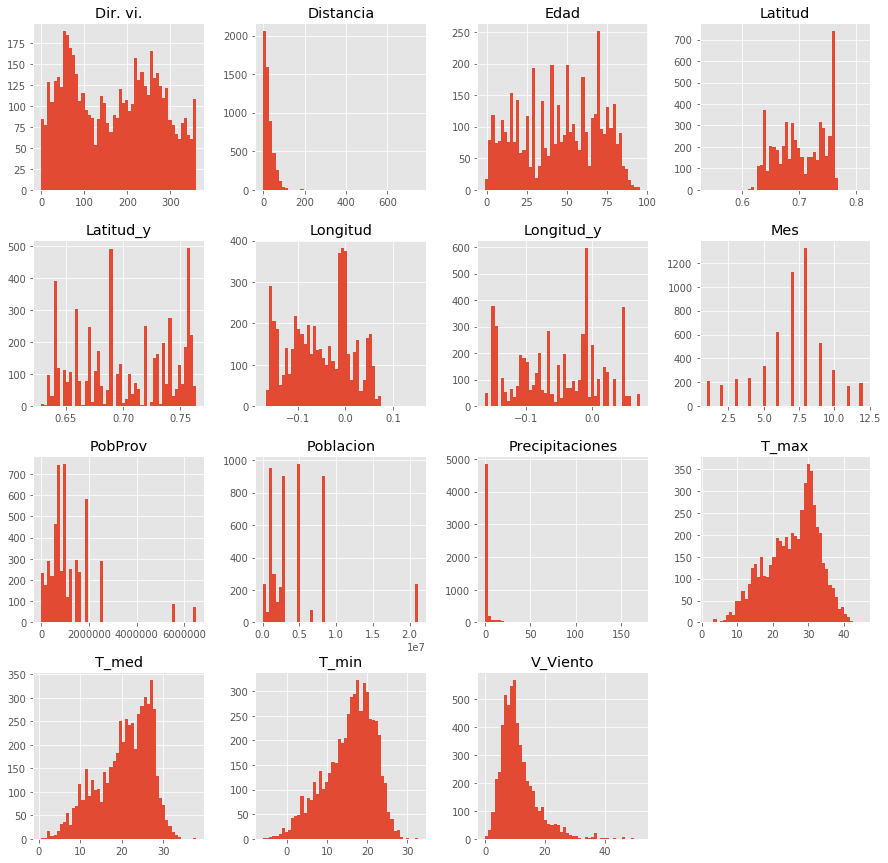

In [29]:
df_inc_clust.drop(['IdPronostico'],1).hist(figsize=(15,15), bins=50)
plt.show()

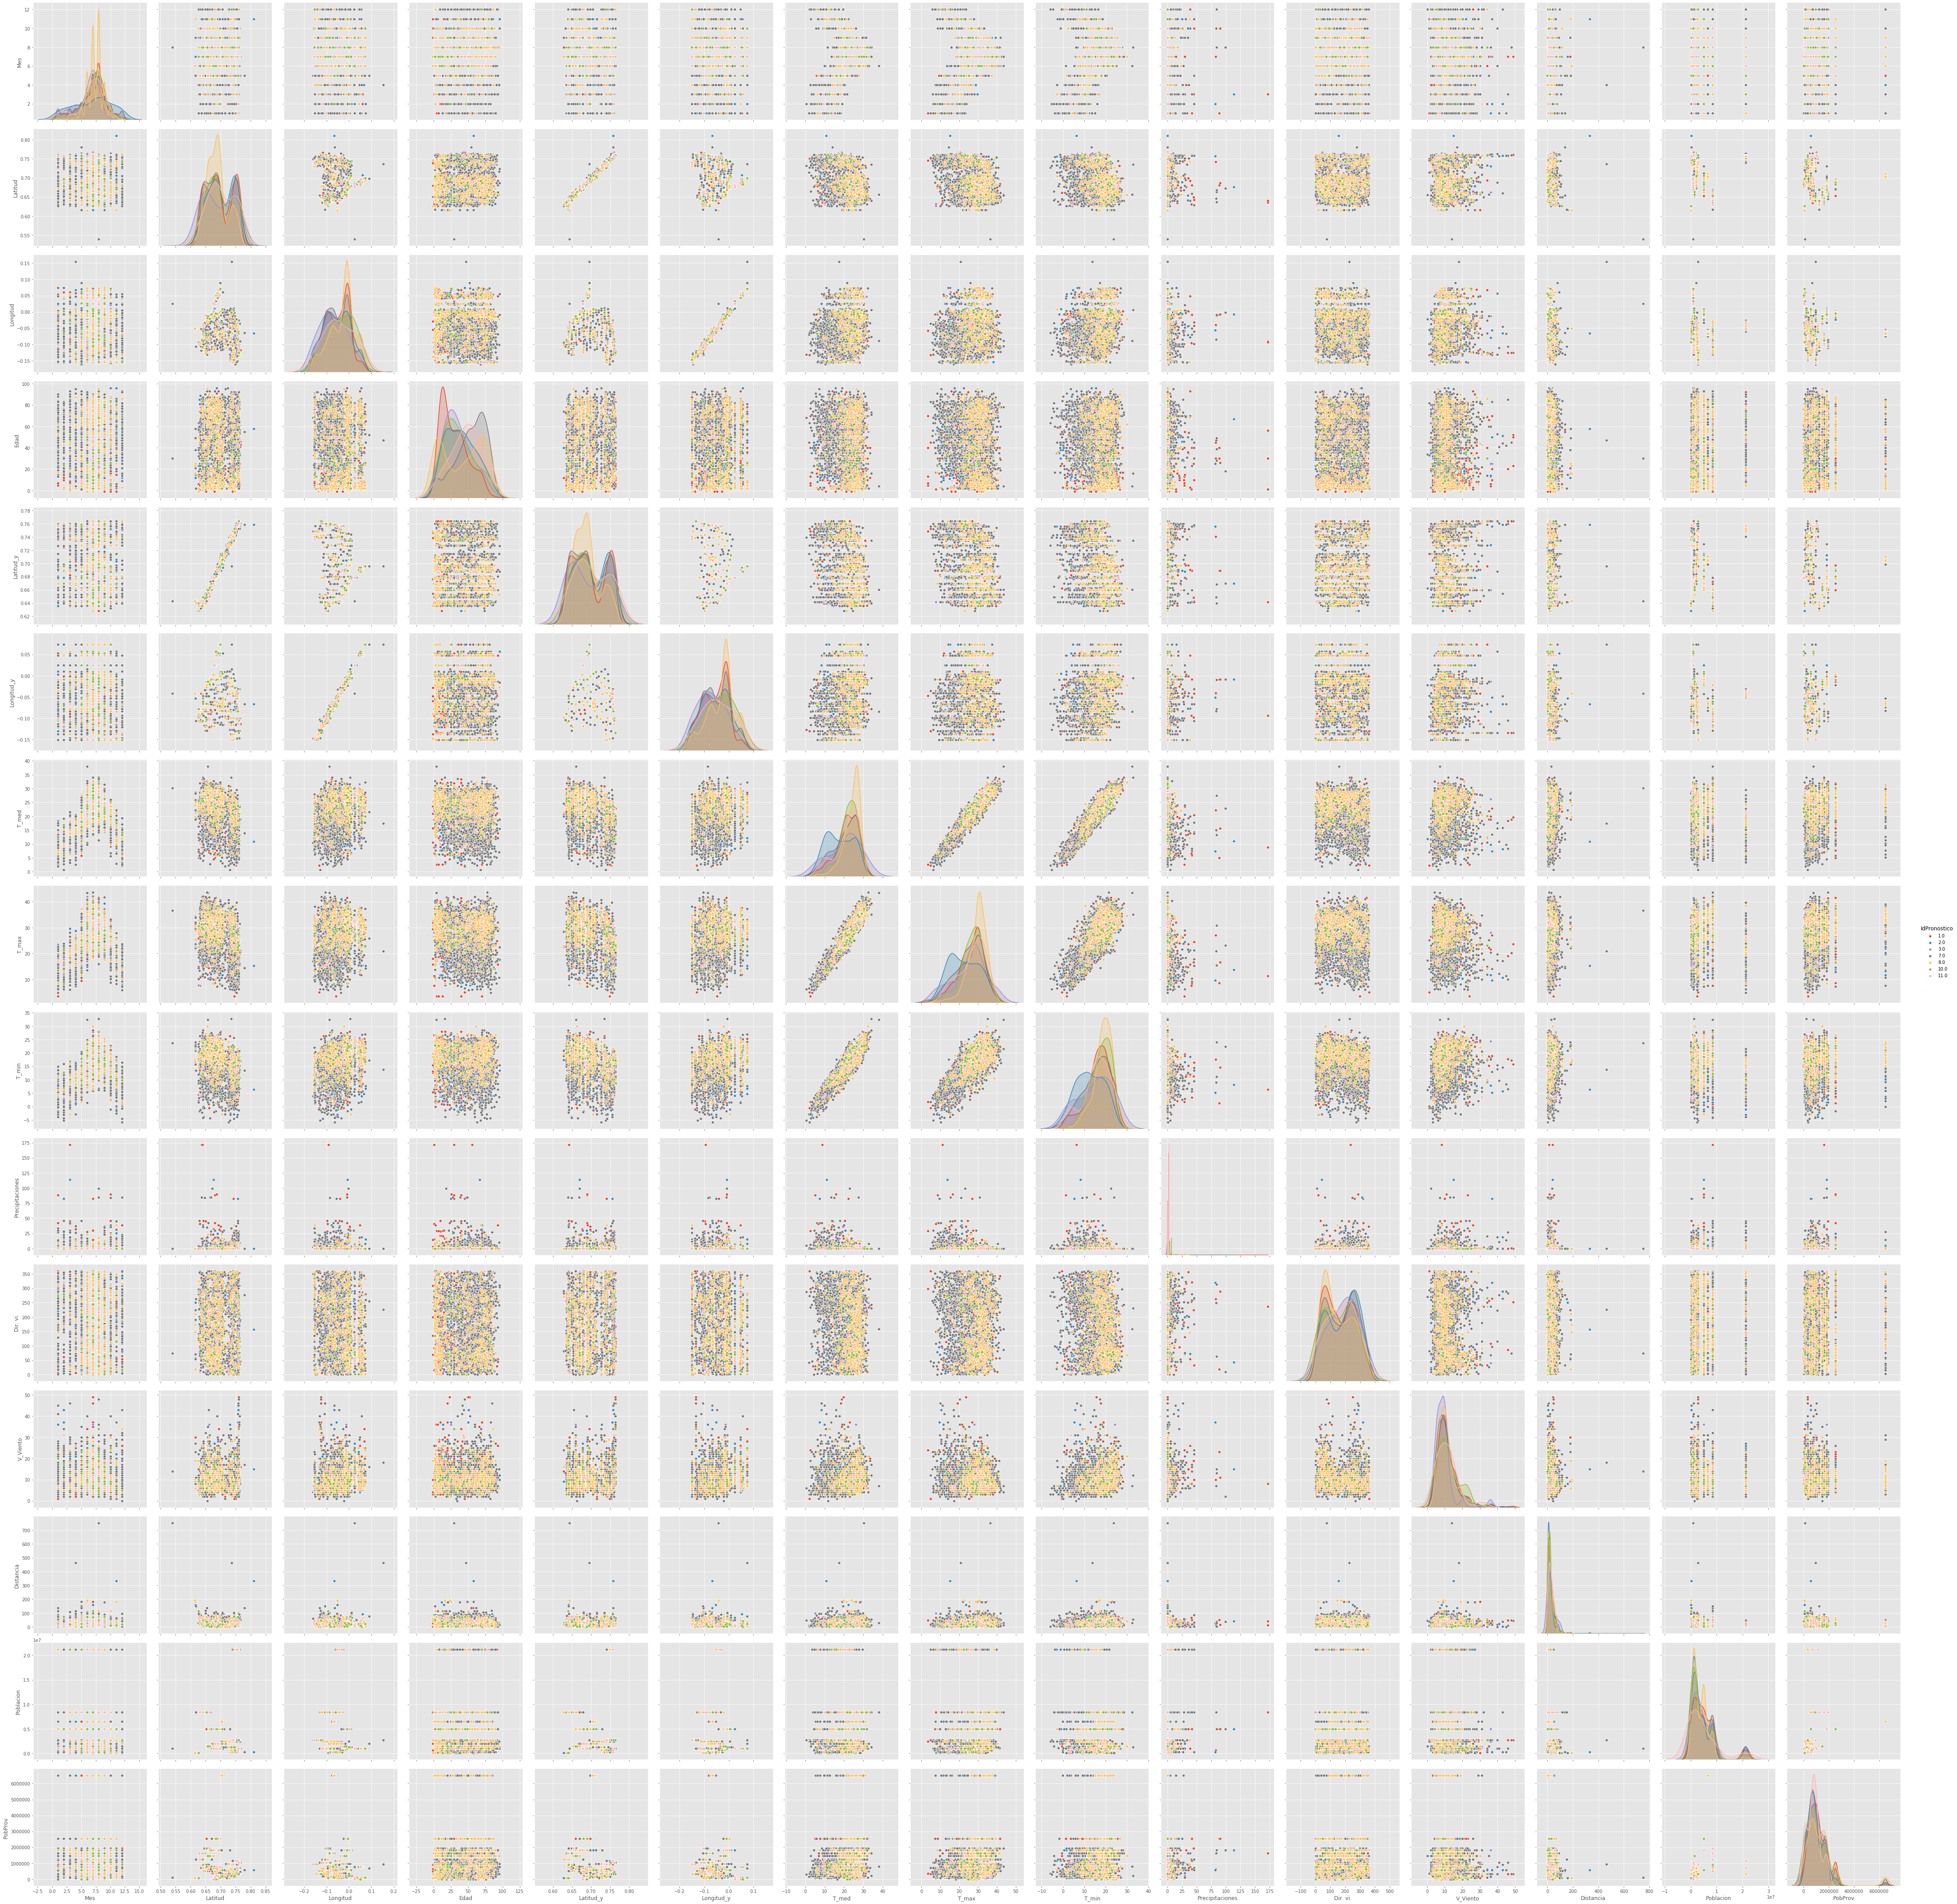

In [30]:
sb.pairplot(df_inc_clust.dropna(), hue='IdPronostico',height=4,vars=df_inc_clust.drop(['IdPronostico'],1),kind='scatter')


In [32]:
#df_inc_clust['IdPronostico'].replace(to_replace=None, value=np.nan)
df_inc_clust['IdPronostico'].unique()



#df_inc_clust['IdPronostico']=df_inc_clust.dropna().astype({'IdPronostico': 'int64'}).dtypes

array([ 7.,  8., 11.,  2., nan,  1.,  3., 10.])

In [20]:
df_inc_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5468 entries, 0 to 5467
Data columns (total 16 columns):
Mes                5468 non-null float64
Latitud            5468 non-null float64
Longitud           5468 non-null float64
Edad               4510 non-null float64
Latitud_y          5468 non-null float64
Longitud_y         5468 non-null float64
T_med              5468 non-null float64
T_max              5468 non-null float64
T_min              5468 non-null float64
Precipitaciones    5468 non-null float64
Dir. vi.           5463 non-null float64
V_Viento           5468 non-null int64
Distancia          5468 non-null float64
IdPronostico       0 non-null object
Poblacion          4995 non-null float64
PobProv            5061 non-null float64
dtypes: float64(14), int64(1), object(1)
memory usage: 683.6+ KB


In [14]:

X = np.array(df_inc_clust.drop(['IdPronostico'],1))
y = np.array(df_inc_clust['IdPronostico'])
X.shape

(5468, 15)

TypeError: list indices must be integers or slices, not numpy.float64

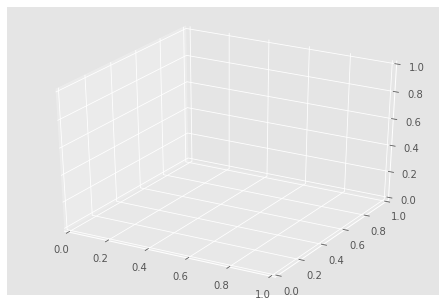

In [12]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)